In [1]:
# ich wollte es hier mal von unserem Datenset losgelöst auspobieren
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg'


In [2]:
#Datensatz mit 2 Spalten und ?? Reihen zufällig generieren
n_samples=100
data = np.random.random((n_samples, 2))
print(data)

data.max()

[[0.57334517 0.04416481]
 [0.8941274  0.19900122]
 [0.51492745 0.13716514]
 [0.04554261 0.73778621]
 [0.10131143 0.65098785]
 [0.2206929  0.70520258]
 [0.82222414 0.00164696]
 [0.3550415  0.01934496]
 [0.37267392 0.2100123 ]
 [0.09855648 0.74409282]
 [0.41539325 0.65405547]
 [0.8318122  0.65738955]
 [0.74436488 0.05765959]
 [0.26846685 0.21215237]
 [0.97847802 0.75832404]
 [0.75029878 0.06472614]
 [0.04086163 0.94555212]
 [0.93659786 0.16048374]
 [0.55426735 0.19459594]
 [0.3947067  0.00891875]
 [0.79257275 0.08129438]
 [0.99512041 0.25403415]
 [0.89332564 0.66091769]
 [0.60270595 0.56118816]
 [0.95418587 0.95507618]
 [0.55707804 0.11922982]
 [0.24773757 0.19168091]
 [0.61841603 0.17561895]
 [0.5286758  0.41482012]
 [0.91568488 0.59713691]
 [0.93395342 0.96641588]
 [0.98511741 0.24057742]
 [0.09091572 0.24956075]
 [0.85127245 0.43560697]
 [0.66088095 0.99917927]
 [0.68977811 0.72227228]
 [0.21634515 0.3967526 ]
 [0.62645126 0.490516  ]
 [0.76527324 0.49369219]
 [0.25174675 0.50542328]


0.9991792654917828

In [3]:
data.shape
data.dtype.name

'float64'

In [4]:
f1=data[0:((n_samples)), 0]

In [5]:
print(f1)

[0.57334517 0.8941274  0.51492745 0.04554261 0.10131143 0.2206929
 0.82222414 0.3550415  0.37267392 0.09855648 0.41539325 0.8318122
 0.74436488 0.26846685 0.97847802 0.75029878 0.04086163 0.93659786
 0.55426735 0.3947067  0.79257275 0.99512041 0.89332564 0.60270595
 0.95418587 0.55707804 0.24773757 0.61841603 0.5286758  0.91568488
 0.93395342 0.98511741 0.09091572 0.85127245 0.66088095 0.68977811
 0.21634515 0.62645126 0.76527324 0.25174675 0.89975762 0.26945647
 0.71795621 0.0588013  0.0389257  0.64371075 0.30754131 0.11215507
 0.7009665  0.45313869 0.51023058 0.23290658 0.27383391 0.3833535
 0.47973214 0.48941344 0.56581313 0.90301539 0.72400602 0.91144188
 0.23192912 0.163722   0.93763304 0.31737914 0.57072963 0.11296547
 0.06363893 0.60765326 0.39158996 0.55743413 0.57661405 0.34081299
 0.52143381 0.63139948 0.80703961 0.03442552 0.92597827 0.43628695
 0.19097545 0.15627521 0.26511477 0.22946548 0.82860614 0.15646866
 0.07626506 0.66601124 0.5633564  0.65558836 0.81164588 0.6167546

In [6]:
f2=data[0:((n_samples)),1]

In [7]:
print(f2)

[0.04416481 0.19900122 0.13716514 0.73778621 0.65098785 0.70520258
 0.00164696 0.01934496 0.2100123  0.74409282 0.65405547 0.65738955
 0.05765959 0.21215237 0.75832404 0.06472614 0.94555212 0.16048374
 0.19459594 0.00891875 0.08129438 0.25403415 0.66091769 0.56118816
 0.95507618 0.11922982 0.19168091 0.17561895 0.41482012 0.59713691
 0.96641588 0.24057742 0.24956075 0.43560697 0.99917927 0.72227228
 0.3967526  0.490516   0.49369219 0.50542328 0.53510461 0.28222734
 0.37414614 0.6132865  0.47642419 0.81165714 0.13138899 0.74283589
 0.03971274 0.99747404 0.58765686 0.22346331 0.37623074 0.95479349
 0.65259251 0.47663412 0.83863168 0.43815639 0.94636375 0.80277772
 0.48414079 0.8710009  0.42054022 0.66104271 0.05848093 0.07220499
 0.679532   0.67238208 0.88573369 0.12375491 0.51494547 0.58264558
 0.26850608 0.91386323 0.89949    0.72102627 0.56856881 0.41672033
 0.01367124 0.91452961 0.44851738 0.70217725 0.29012729 0.31782453
 0.26686635 0.06312054 0.55746945 0.65892299 0.44799739 0.6928

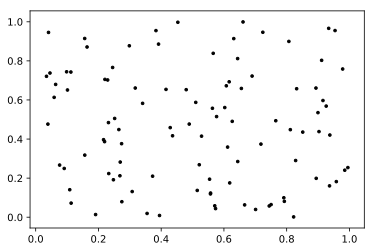

In [8]:
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [9]:
print (X)

[[0.57334517 0.04416481]
 [0.8941274  0.19900122]
 [0.51492745 0.13716514]
 [0.04554261 0.73778621]
 [0.10131143 0.65098785]
 [0.2206929  0.70520258]
 [0.82222414 0.00164696]
 [0.3550415  0.01934496]
 [0.37267392 0.2100123 ]
 [0.09855648 0.74409282]
 [0.41539325 0.65405547]
 [0.8318122  0.65738955]
 [0.74436488 0.05765959]
 [0.26846685 0.21215237]
 [0.97847802 0.75832404]
 [0.75029878 0.06472614]
 [0.04086163 0.94555212]
 [0.93659786 0.16048374]
 [0.55426735 0.19459594]
 [0.3947067  0.00891875]
 [0.79257275 0.08129438]
 [0.99512041 0.25403415]
 [0.89332564 0.66091769]
 [0.60270595 0.56118816]
 [0.95418587 0.95507618]
 [0.55707804 0.11922982]
 [0.24773757 0.19168091]
 [0.61841603 0.17561895]
 [0.5286758  0.41482012]
 [0.91568488 0.59713691]
 [0.93395342 0.96641588]
 [0.98511741 0.24057742]
 [0.09091572 0.24956075]
 [0.85127245 0.43560697]
 [0.66088095 0.99917927]
 [0.68977811 0.72227228]
 [0.21634515 0.3967526 ]
 [0.62645126 0.490516  ]
 [0.76527324 0.49369219]
 [0.25174675 0.50542328]


In [10]:
# number of clusters
k=4

#initialization, Coordinates of random centroids

#choose some points of the data

xAchsemax= f1.max()
xAchsemin = f1.min()

print(xAchsemax)
print(xAchsemin)

yAchsemax = f2.max()
yAchsemin = f2.min()

print(yAchsemax)
print(yAchsemin)

cx = np.random.randint(((xAchsemin)),((xAchsemax)),size=k)
cy = np.random.randint(((yAchsemin)),((yAchsemax)),size=k)


print(cx)
print(cy)

#Koordinaten der Punkte bestimmen




0.9951204067933506
0.034425515804459295
0.9991792654917828
0.0016469624917309078


ValueError: Range cannot be empty (low >= high) unless no samples are taken

In [ ]:
# dieser Bereich ist hier leer, da zwischen 0 und 1 keine natürliche Zahl
# könnte man das so für unseren Datensatz verwenden?

In [11]:
# daher zufällige Zahl zwischen 0 und 1 auswählen -> Koordinaten der zufälligen Centroiden

C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]



#C = np.array(list(zip(cx1, cy1)), dtype=np.float32)

print(C)

[[0.71804164 0.12308814]
 [0.06928291 0.68089716]
 [0.05495896 0.06648554]
 [0.0376792  0.61087072]]


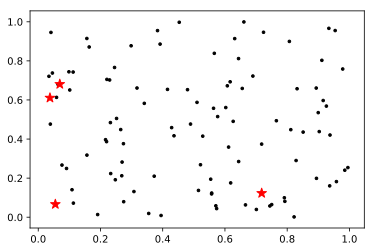

In [12]:
plt.scatter(f1,f2,c='black',s=7)

#plt.scatter(C[0:((k)),0],C[0:((k)),1],marker='*',c='red',s=100)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)


In [13]:
# Distanz Punkte - Centroids berechnen
#dist = (((cx1-f1)**2 + (cy1-f2)**2)*0.5)

In [14]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [15]:
#dist(X[1],C)

In [16]:
# Datenpunkte hier noch keinem Cluster zugeordnet
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [27]:
C_old = np.zeros(C.shape)
print(C_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [18]:
error = dist(C, C_old, None)

In [19]:
from copy import deepcopy

In [20]:
#while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

IndentationError: unexpected indent (<ipython-input-20-4ed817a6c264>, line 2)

In [21]:
#im ersten Schritt wird für jeden Punkt die euklidische Distanz zu allen Centern ausgerechnet
    
for i in range(len(X)):
     distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
     print(distances)
    

[0.164821   0.81210027 0.51886653 0.77980357]
[0.19175242 0.95529689 0.84956699 0.95033679]
[0.20360142 0.70302459 0.46536718 0.67243057]
[0.91110299 0.06164386 0.67136671 0.12715886]
[0.81180925 0.04382229 0.58633737 0.07522263]
[0.76564547 0.15334843 0.65986908 0.20589442]
[0.16000611 1.01405194 0.76999993 0.9933098 ]
[0.37753377 0.72063117 0.30376268 0.67128351]
[0.35613856 0.5601595  0.34862979 0.52240687]
[0.87715944 0.06964649 0.67900838 0.14647242]
[0.61116475 0.3471496  0.6893122  0.38017473]
[0.5462799  0.76289156 0.97604739 0.79549432]
[0.07052523 0.9187822  0.68946241 0.8974671 ]
[0.45831205 0.50930926 0.25846556 0.46069433]
[0.68655062 0.91248599 1.15391853 0.95228404]
[0.06668318 0.91839499 0.69534205 0.89783104]
[1.06537306 0.26617666 0.87917961 0.33469653]
[0.22173238 1.01146693 0.88663566 1.00543681]
[0.17870474 0.68680331 0.51548147 0.66343651]
[0.3428996  0.74662951 0.34459028 0.69986771]
[0.08544943 0.93950609 0.73776243 0.92212546]
[0.30646288 1.01950337 0.95868557 

In [22]:
 # nächster Zentroid eines Datenpunktes -> z.B. erster Datenpunkt liegt am nächsten am dritten Zentroid
for i in range(len(X)):
        distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
        cluster = np.argmin(distances)
        print(cluster)

0
0
0
1
1
1
0
2
2
1
1
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
2
0
1
0
3
0
0
3
0
2
0
3
3
1
2
1
0
1
1
2
3
1
1
0
1
0
1
0
3
1
0
1
0
2
1
1
1
0
0
1
0
1
1
1
0
0
2
1
3
1
0
2
2
0
0
0
0
1
0
2
0
1
0
3
2
1
0
3


In [23]:
#Datenpunkte in Cluser eingeteilt -> zugehöriger array erstellt
for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            print(clusters)
            

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 3. 0. 0. 3. 0. 2. 0. 3. 3. 1. 2. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 3. 0. 0. 3. 0. 2. 0. 3. 3. 1. 2. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 3. 0. 0. 3. 0. 2. 0. 3. 3. 1. 2. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2.

[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 3. 0. 0. 3. 0. 2. 0. 3. 3. 1. 2. 1.
 0. 1. 1. 2. 3. 1. 1. 0. 1. 0. 1. 0. 3. 1. 0. 1. 0. 2. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 2. 1. 3. 1. 0. 2. 2. 0. 0. 0. 0. 1. 0. 2. 0. 1. 0. 3.
 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 3. 0. 0. 3. 0. 2. 0. 3. 3. 1. 2. 1.
 0. 1. 1. 2. 3. 1. 1. 0. 1. 0. 1. 0. 3. 1. 0. 1. 0. 2. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 2. 1. 3. 1. 0. 2. 2. 0. 0. 0. 0. 1. 0. 2. 0. 1. 0. 3.
 2. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 3. 0. 0. 3. 0. 2. 0. 3. 3. 1. 2. 1.
 0. 1. 1. 2. 3. 1. 1. 0. 1. 0. 1. 0. 3. 1. 0. 1. 0. 2. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 2. 1. 3. 1. 0. 2. 2. 0. 0. 0. 0. 1. 0. 2. 0. 1. 0. 3.
 2. 1. 0. 0.]
[0. 0. 0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2.

In [24]:
#neue Zentroiden berechnet
for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
print(C)

[[0.7371587  0.3632061 ]
 [0.35721598 0.78650085]
 [0.21889989 0.17218191]
 [0.2205607  0.46065654]]


In [25]:
while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

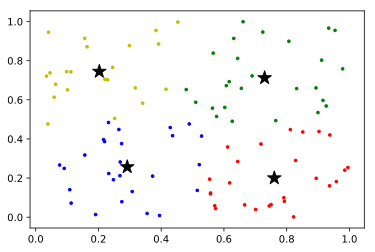

In [26]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')